# 

# LCMS

## Setup

In [ ]:
library(readxl)
library(data.table)
library(ggplot2)
library(patchwork)
library(here)


here() starts at C:/Users/alosvendsen/Documents/R/manuscript

## Donor 3, AS0013B, Midazolam

**Load data**

In [ ]:
##| output: false
##| warning: false
# 
# # Ignore warnings. Just NA's as expected
# data <-
#   read_excel(
#     path = here("notebooks/LCMS/data_raw/230628RAVERSION_Short.xlsx"),
#     sheet = "Hydroxymidazolam",
#     skip = 4,
#     col_types = c(
#       "text", "skip", "skip", "skip",
#       "skip", "skip", "skip", "skip",
#       "numeric", "skip", "skip", "text",
#       "skip", "skip", "skip", "skip"
#     ),
#     col_names = c("sample_name", "amount", "peak_status")
#   )
# 
# metabolite <- "Hydroxymidazolam"
# data$metabolite <- metabolite
# 
# # Set as DT, and get only samples
# setDT(data)
# data <- data[grepl("AS", data$sample_name)] # get samples of interest


In [ ]:
# sample_info <- read_excel(here("notebooks/LCMS/data_raw/AS0013B_sample_info.xlsx"))
# 
# tidy_data <- merge.data.table(data, sample_info, by = "sample_name")
# 
# # Check dt structure
# str(tidy_data)
# 
# # Make treatment a factor
# tidy_data <- 
#   tidy_data[, 
#             treatment := factor(treatment,
#                                 levels = c("control",
#                                            "medium",
#                                            "0.01 ng/ml IL-6",
#                                            "0.1 ng/ml IL-6",
#                                            "1 ng/ml IL-6",
#                                            "10 ng/ml IL-6",
#                                            "0.01 ng/ml IL-1B",
#                                            "0.1 ng/ml IL-1B",
#                                            "1 ng/ml IL-1B",
#                                            "10 ng/ml IL-1B"
#                                            ),
#                                 ordered = TRUE
#                                 )
#             ]


Check peak status’ for any amounts below what below/above the limit of our standard curve.

In [ ]:
# # Check peak status'
# unique(tidy_data$peak_status)
# # Find any that is not NA
# tidy_data[!is.na(peak_status)] |> knitr::kable()


#### Should this be omitted? It is below the lowest point on our standard curve, but omitting it would make the mean higher, than it really is?

**Mean of replicates and activity relative to vehicle control**

In [ ]:
# # Calculate the mean amount of replicates
# tidy_data[, 
#           mean_amount := mean(amount, na.rm = TRUE), 
#           by = .(treatment, time_treatment, time_incubation)
#           ]
# 
# 
# # Add column with control mean amounts grouped by time_treatment and time_incubation
# tidy_data[,
#           control_mean_amount := mean(mean_amount[treatment == "control"]),
#           by = .(time_treatment, time_incubation)
#           ]
# 
# # Calculate both amounts and mean_amounts relative to control
# tidy_data[,
#           `:=`(
#             relative_amount = amount / control_mean_amount,
#             mean_relative_amount = mean_amount / control_mean_amount
#             )
#           ]


**Save the data**

In [ ]:
# saveRDS(tidy_data, file = here("notebooks/LCMS/data_processed/AS0013.rds"))


#### **Plots**

In [ ]:
tidy_data <- readRDS(here("notebooks/LCMS/data_processed/AS0013.rds"))


In [ ]:
# Create groups/look up tables for subsetting data
group_IL6 <- c("control", 
               #"medium", 
               "0.01 ng/ml IL-6", 
               "0.1 ng/ml IL-6",
               "1 ng/ml IL-6", 
               "10 ng/ml IL-6"
               )

group_IL1B <- c("control", 
                #"medium", 
                "0.01 ng/ml IL-1B", 
                "0.1 ng/ml IL-1B",
                "1 ng/ml IL-1B",
                "10 ng/ml IL-1B"
                )


IL-6 effect on CYP3A4

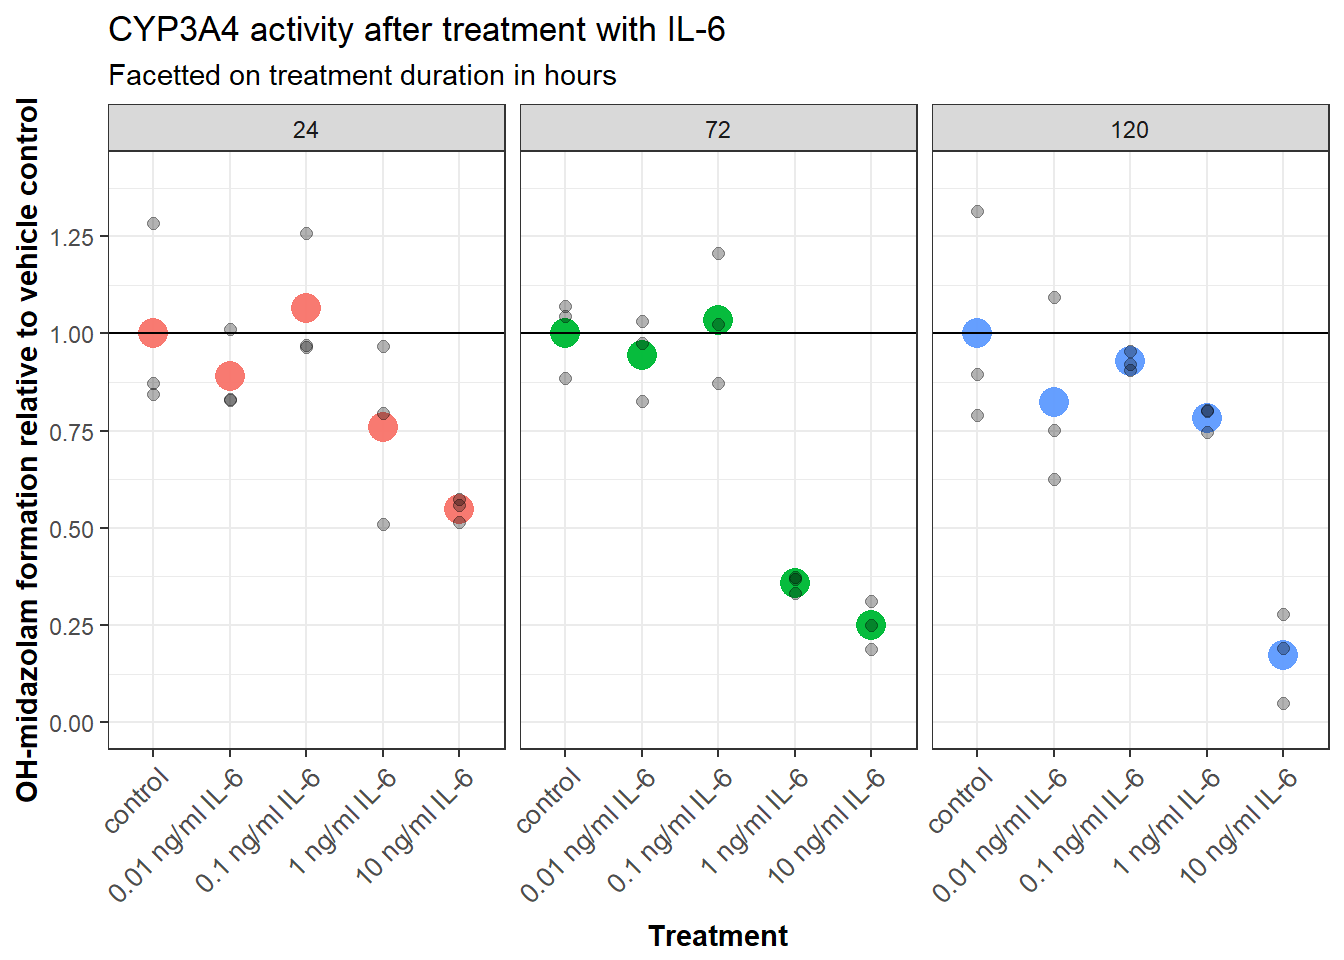

In [ ]:
plot_data <- tidy_data[time_incubation == 0.5 &
  treatment %in% group_IL6]

act_3A4_IL_6_AS0013 <- 
ggplot(data = plot_data) +
  geom_point(
    aes(
      x = treatment,
      y = mean_relative_amount,
      color = factor(time_treatment)
    ),
    size = 5,
    alpha = 0.7
  ) +
  geom_point(
    aes(
      x = treatment,
      y = relative_amount
    ),
    size = 2,
    alpha = 0.3
  ) +
  geom_hline(yintercept = 1) +
  scale_y_continuous(
    name = "OH-midazolam formation relative to vehicle control", 
    breaks = seq(from = 0, to = 1.5, by= 0.25), limits = c(0, 1.4)
    ) +
  facet_wrap(
    facets = vars(factor(time_treatment))
  ) +
  theme_bw() +
  xlab("Treatment") + 
  ggtitle("CYP3A4 activity after treatment with IL-6",
          subtitle = "Facetted on treatment duration in hours") +
  ylab("Metabolite formation relative to vehicle control") +
  theme(axis.text.x = element_text(size = 10, angle = 45, hjust = 1),
        axis.title.x = element_text(hjust = 0.5, vjust = 0, face = "bold"),
        axis.title.y = element_text(face = "bold"),
        legend.position = "none"
  )

act_3A4_IL_6_AS0013


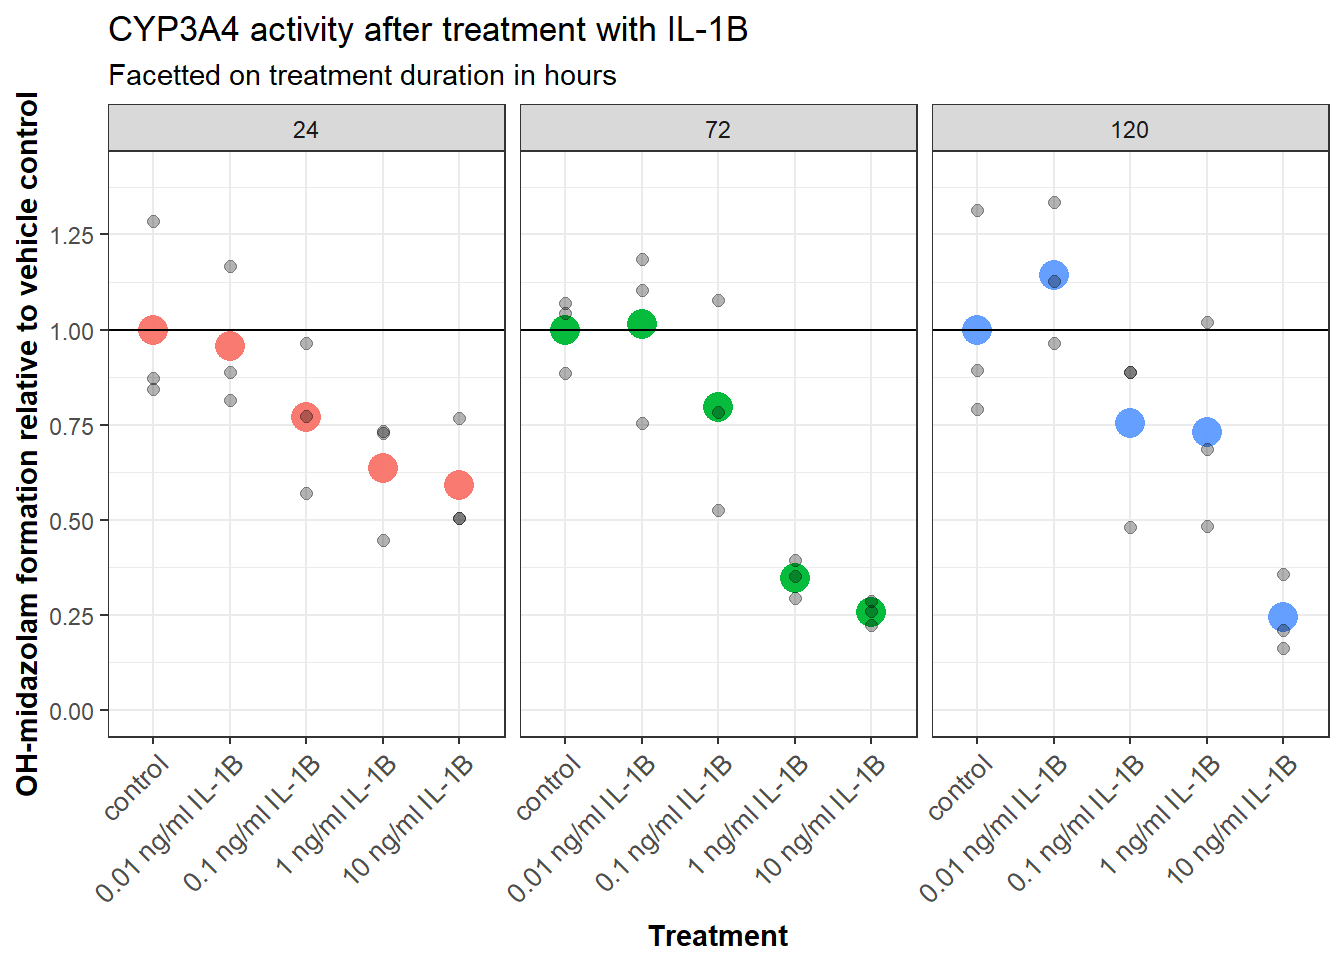

In [ ]:
plot_data <- tidy_data[time_incubation == 0.5 &
  treatment %in% group_IL1B]

act_3A4_IL_1B_AS0013 <- 
ggplot(data = plot_data) +
  geom_point(
    aes(
      x = treatment,
      y = mean_relative_amount,
      color = factor(time_treatment)
    ),
    size = 5,
    alpha = 0.7
  ) +
  geom_point(
    aes(
      x = treatment,
      y = relative_amount
    ),
    size = 2,
    alpha = 0.3
  ) +
  geom_hline(yintercept = 1) +
  scale_y_continuous(
    name = "OH-midazolam formation relative to vehicle control", 
    breaks = seq(from = 0, to = 1.5, by= 0.25), limits = c(0, 1.4)
    ) +
  facet_wrap(
    facets = vars(factor(time_treatment))
  ) +
  theme_bw() +
  xlab("Treatment") + 
  ggtitle("CYP3A4 activity after treatment with IL-1B",
          subtitle = "Facetted on treatment duration in hours") +
  ylab("Metabolite formation relative to vehicle control") +
  theme(axis.text.x = element_text(size = 10, angle = 45, hjust = 1),
        axis.title.x = element_text(hjust = 0.5, vjust = 0, face = "bold"),
        axis.title.y = element_text(face = "bold"),
        legend.position = "none"
  )

act_3A4_IL_1B_AS0013


## Donor 2, AS0008, midazolam

**Load data**

In [ ]:
## | output: false
## | warning: false
# # Ignore warnings. Just NA's as expected
# data <-
#   read_excel(
#     path = here("notebooks/LCMS/data_raw/220506_AS008_v1_Short.xlsx"),
#     sheet = "Hydroxymidazolam",
#     skip = 4,
#     col_types = c(
#       "text", "skip", "skip", "skip",
#       "skip", "skip", "skip", "skip",
#       "numeric", "skip", "skip", "text",
#       "skip", "skip", "skip", "skip"
#     ),
#     col_names = c("sample_name", "amount", "peak_status")
#   )
# 
# metabolite <- "Hydroxymidazolam"
# data$metabolite <- metabolite
# 
# # Set as DT, and get only samples
# setDT(data)
# data <- data[grepl("AS", data$sample_name)] # get samples of interest


In [ ]:
# sample_info <- read_excel(here("notebooks/LCMS/data_raw/AS0008_sample_info.xlsx"))
# 
# tidy_data <- merge.data.table(data, sample_info, by = "sample_name")
# 
# # Check dt structure
# str(tidy_data)
# 
# # Make treatment a factor
# tidy_data <- 
#   tidy_data[, 
#             treatment := factor(treatment,
#                                 levels = c("control",
#                                            "medium",
#                                            "0.01 ng/ml IL-6",
#                                            "0.1 ng/ml IL-6",
#                                            "1 ng/ml IL-6",
#                                            "10 ng/ml IL-6",
#                                            "0.01 ng/ml IL-1B",
#                                            "0.1 ng/ml IL-1B",
#                                            "1 ng/ml IL-1B",
#                                            "10 ng/ml IL-1B"
#                                            ),
#                                 ordered = TRUE
#                                 )
#             ]


Check peak status’ for any amounts below what below/above the limit of our standard curve.

In [ ]:
# # Check peak status'
# unique(tidy_data$peak_status)
# # Find any that is not NA
# tidy_data[!is.na(peak_status)]
# 
# # Remove samples 152, 153, 162, 163, 172, and 173 as no baselcocktail was added to there wells, and that is why there is no peaks
# # Remove sample 171, as there was no spheroid in this. 
# # Note that to are left with "response low". 
# remove_samples <- tidy_data[!is.na(peak_status)][-c(1, 9)]
# remove_samples |> knitr::kable()
# 
# tidy_data <- tidy_data[!remove_samples, ]


#### Same as for other donor, should the response low samples be removed? It is below the lowest point on our standard curve, but omitting it would make the mean higher, than it really is?

**Mean of replicates and activity relative to vehicle control**

In [ ]:
# # Calculate the mean amount of replicates
# tidy_data[, 
#           mean_amount := mean(amount, na.rm = TRUE), 
#           by = .(treatment, time_treatment, time_incubation)
#           ]
# 
# 
# # Add column with control mean amounts grouped by time_treatment and time_incubation
# tidy_data[,
#           control_mean_amount := mean(mean_amount[treatment == "control"]),
#           by = .(time_treatment, time_incubation)
#           ]
# 
# # Calculate both amounts and mean_amounts relative to control
# tidy_data[,
#           `:=`(
#             relative_amount = amount / control_mean_amount,
#             mean_relative_amount = mean_amount / control_mean_amount
#             )
#           ]


**Save the data**

In [ ]:
# saveRDS(tidy_data, file = here("notebooks/LCMS/data_processed/AS0008.rds"))


#### **Plots**

In [ ]:
tidy_data <- readRDS(here("notebooks/LCMS/data_processed/AS0008.rds"))


In [ ]:
# Create groups/look up tables for subsetting data
group_IL6 <- c("control", 
               #"medium", 
               "0.01 ng/ml IL-6", 
               "0.1 ng/ml IL-6",
               "1 ng/ml IL-6", 
               "10 ng/ml IL-6"
               )

group_IL1B <- c("control", 
                #"medium", 
                "0.01 ng/ml IL-1B", 
                "0.1 ng/ml IL-1B",
                "1 ng/ml IL-1B",
                "10 ng/ml IL-1B"
                )


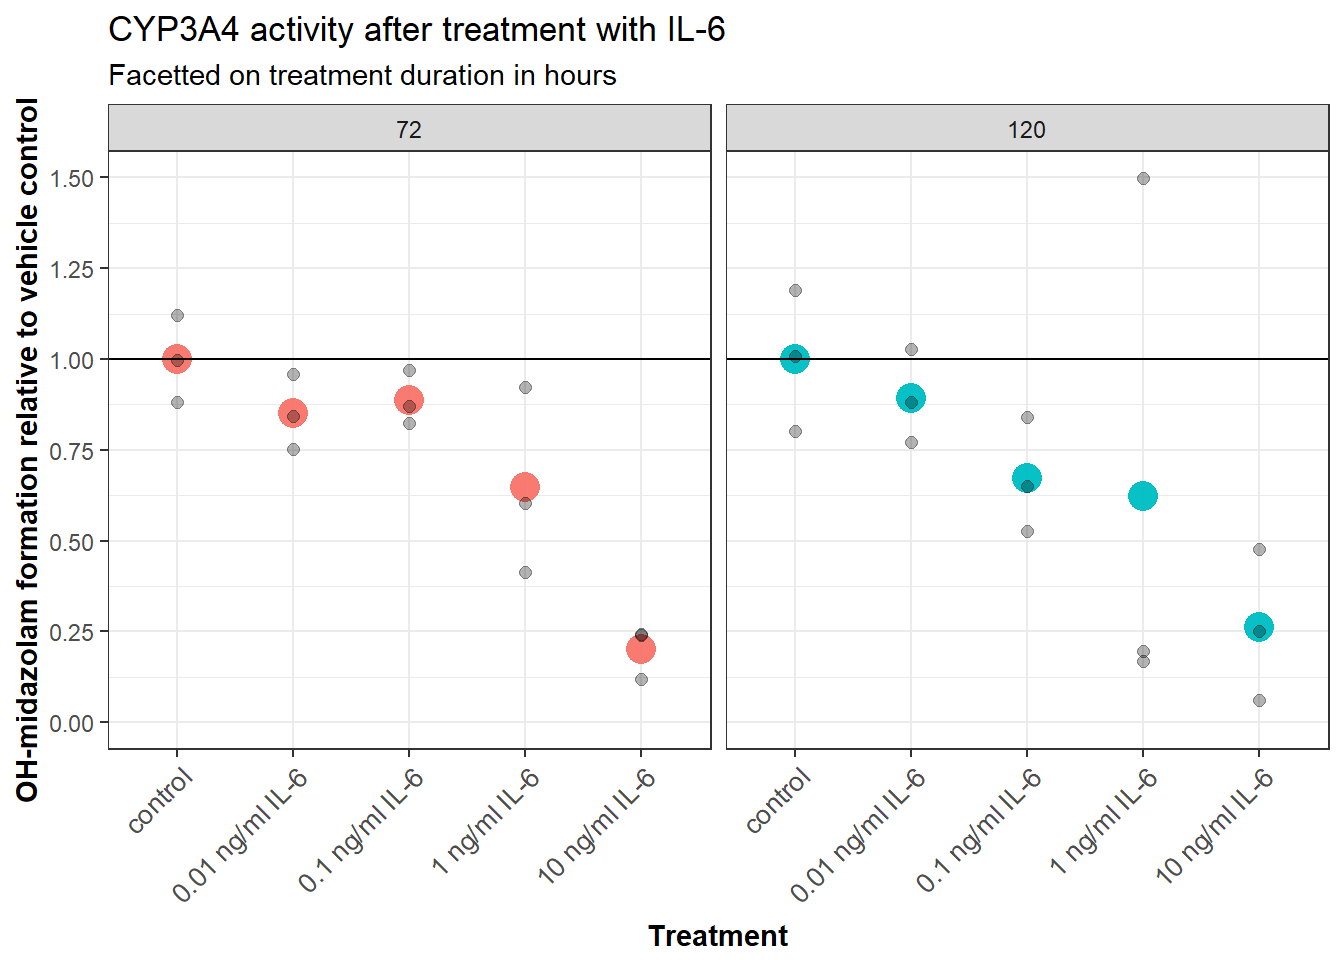

In [ ]:
plot_data <- tidy_data[time_incubation == 0.5 &
  treatment %in% group_IL6]

act_3A4_IL_6_AS008 <- 
ggplot(data = plot_data) +
  geom_point(
    aes(
      x = treatment,
      y = mean_relative_amount,
      color = factor(time_treatment)
    ),
    size = 5,
    alpha = 0.7
  ) +
  geom_point(
    aes(
      x = treatment,
      y = relative_amount
    ),
    size = 2,
    alpha = 0.3
  ) +
  geom_hline(yintercept = 1) +
  scale_y_continuous(
    name = "OH-midazolam formation relative to vehicle control", 
    breaks = seq(from = 0, to = 1.5, by= 0.25), limits = c(0, NA)
    ) +
  facet_wrap(
    facets = vars(factor(time_treatment))
  ) +
  theme_bw() +
  xlab("Treatment") + 
  ggtitle("CYP3A4 activity after treatment with IL-6",
          subtitle = "Facetted on treatment duration in hours") +
  ylab("Metabolite formation relative to vehicle control") +
  theme(axis.text.x = element_text(size = 10, angle = 45, hjust = 1),
        axis.title.x = element_text(hjust = 0.5, vjust = 0, face = "bold"),
        axis.title.y = element_text(face = "bold"),
        legend.position = "none"
  )

act_3A4_IL_6_AS008


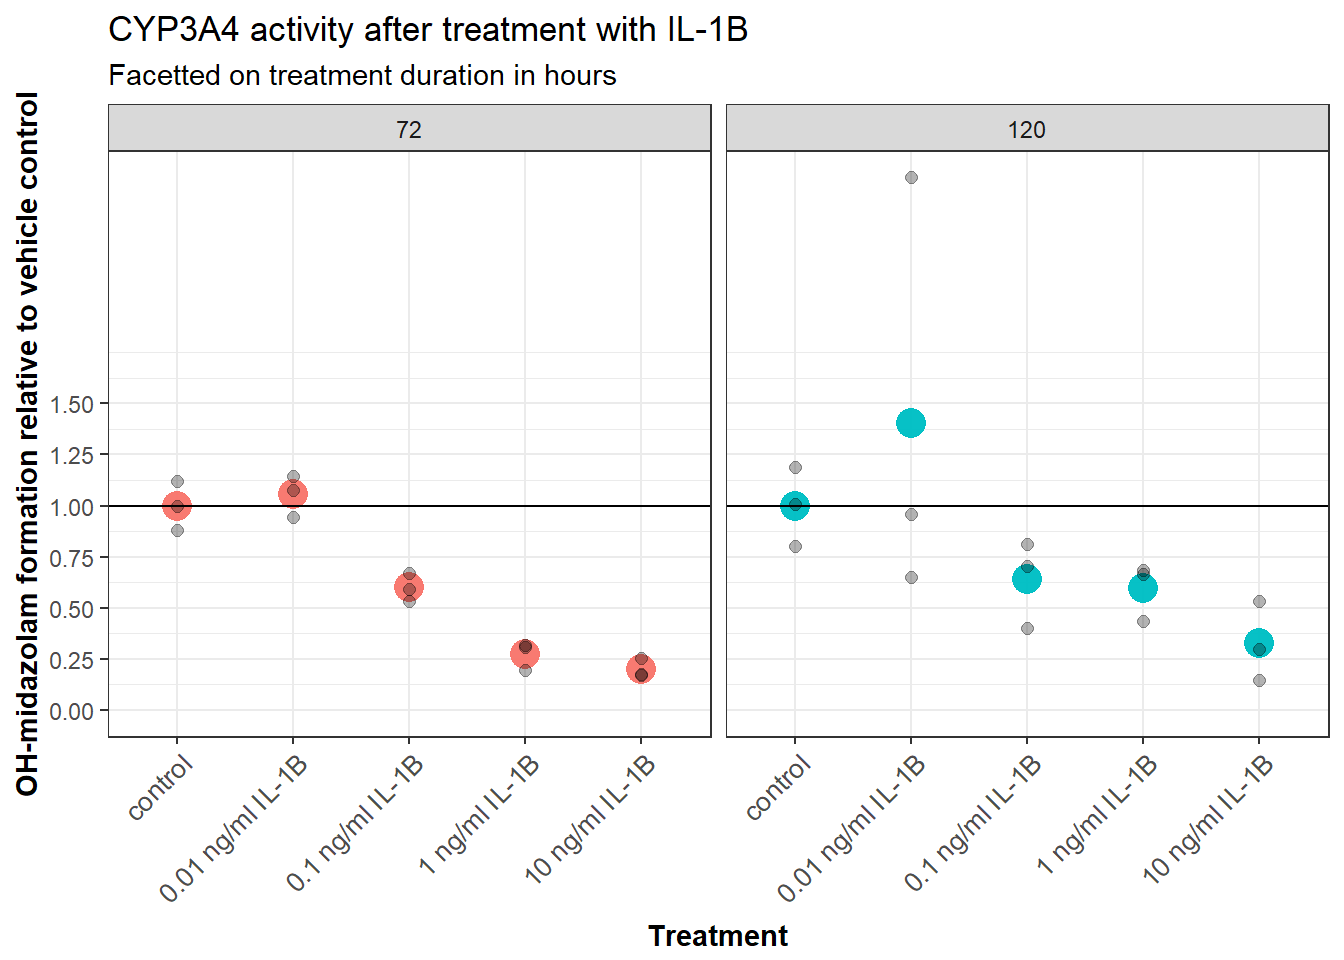

In [ ]:
plot_data <- tidy_data[time_incubation == 0.5 &
  treatment %in% group_IL1B]

act_3A4_IL_1B_AS008 <- 
ggplot(data = plot_data) +
  geom_point(
    aes(
      x = treatment,
      y = mean_relative_amount,
      color = factor(time_treatment)
    ),
    size = 5,
    alpha = 0.7
  ) +
  geom_point(
    aes(
      x = treatment,
      y = relative_amount
    ),
    size = 2,
    alpha = 0.3
  ) +
  geom_hline(yintercept = 1) +
  scale_y_continuous(
    name = "OH-midazolam formation relative to vehicle control", 
    breaks = seq(from = 0, to = 1.5, by= 0.25), limits = c(0, NA)
    ) +
  facet_wrap(
    facets = vars(factor(time_treatment))
  ) +
  theme_bw() +
  xlab("Treatment") + 
  ggtitle("CYP3A4 activity after treatment with IL-1B",
          subtitle = "Facetted on treatment duration in hours") +
  ylab("Metabolite formation relative to vehicle control") +
  theme(axis.text.x = element_text(size = 10, angle = 45, hjust = 1),
        axis.title.x = element_text(hjust = 0.5, vjust = 0, face = "bold"),
        axis.title.y = element_text(face = "bold"),
        legend.position = "none"
  )

act_3A4_IL_1B_AS008


## Combine and save final dataframe

In [ ]:
# files <- fs::dir_ls(here("notebooks/LCMS/data_processed"), regexp = "AS")
# 
# data <- lapply(files, readRDS)
# 
# final_data <- rbindlist(data, idcol = "file")
# final_data[, file := gsub(pattern = "notebooks/LCMS/data_processed/", replacement = "", file)]
# 
# saveRDS(final_data, file = here("notebooks/LCMS/data_processed/final_data.rds"))


## Main plots

load data

In [ ]:
data <- readRDS(here("notebooks/LCMS/data_processed/final_data.rds"))


In [ ]:
# Create groups/look up tables for subsetting data
group_IL6 <- c(#"control", 
               #"medium", 
               "0.01 ng/ml IL-6", 
               "0.1 ng/ml IL-6",
               "1 ng/ml IL-6", 
               "10 ng/ml IL-6"
               )

group_IL1B <- c(#"control", 
                #"medium", 
                "0.01 ng/ml IL-1B", 
                "0.1 ng/ml IL-1B",
                "1 ng/ml IL-1B",
                "10 ng/ml IL-1B"
                )


### Facetted on time

IL-6

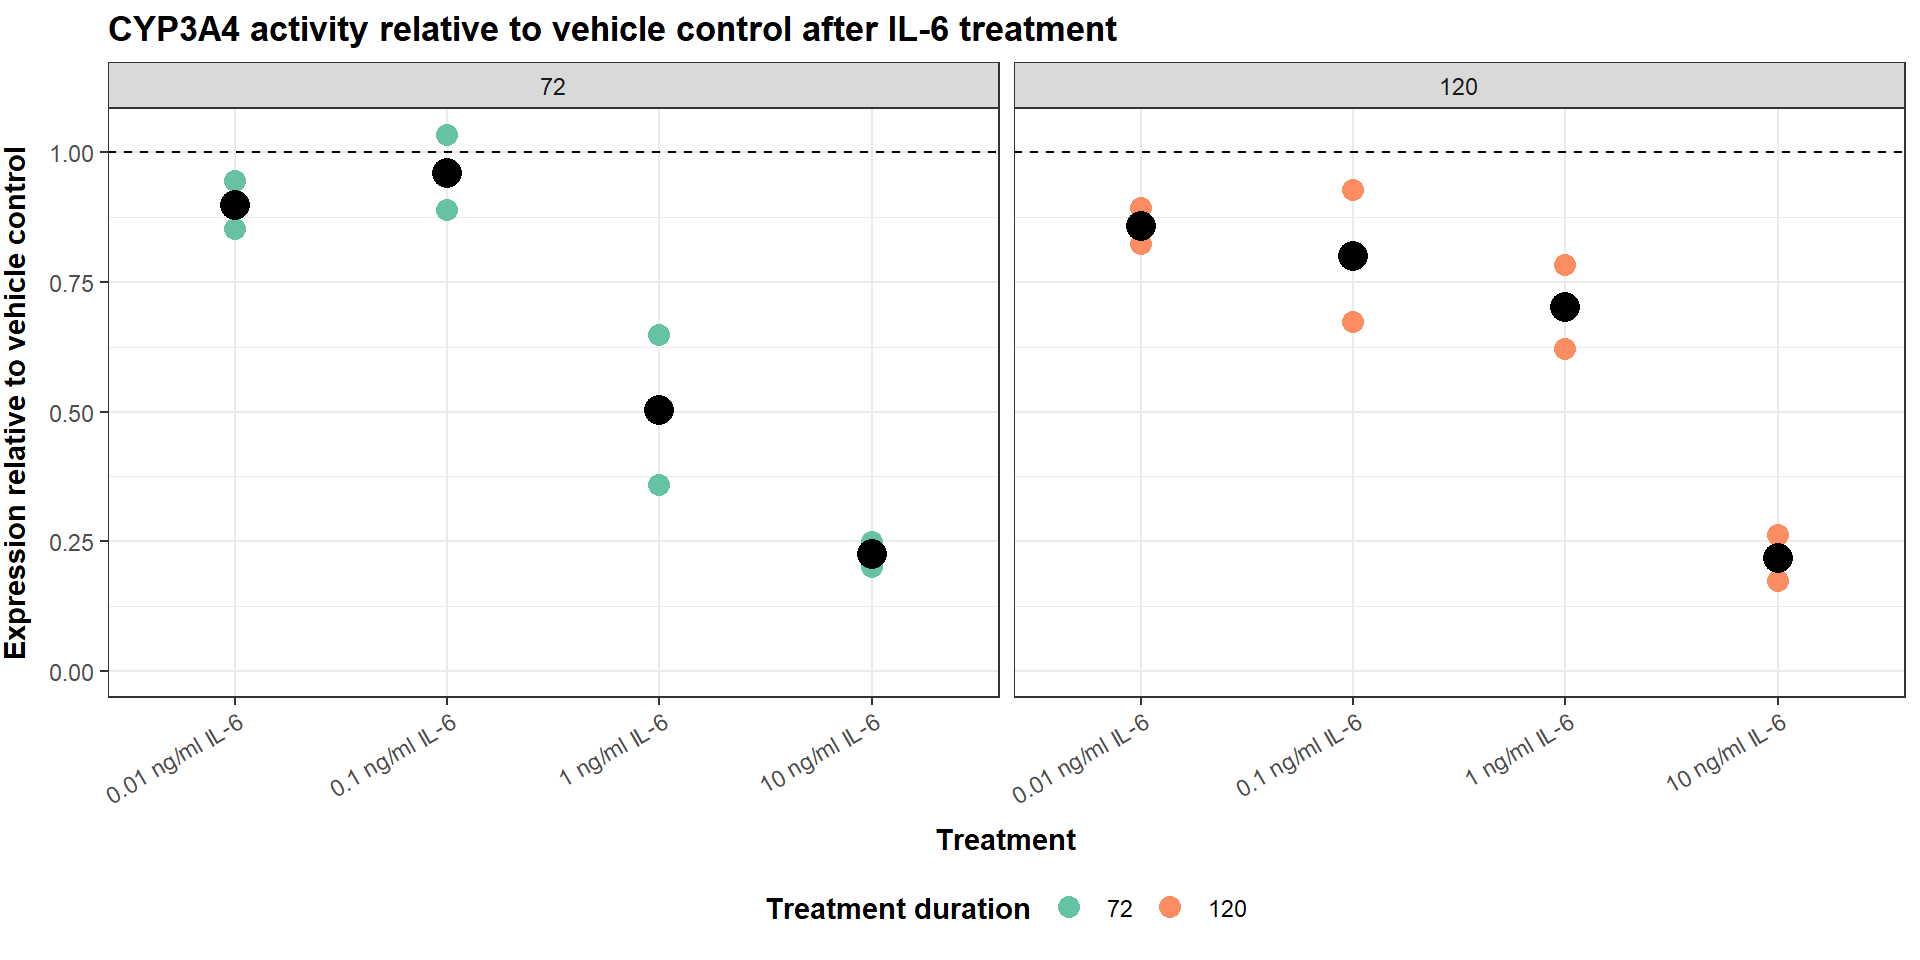

In [ ]:

plot_data_IL6 <- data[time_incubation == 0.5 
                      & treatment %in% group_IL6
                      & time_treatment != 24]


act_3A4_IL6 <- ggplot(data = plot_data_IL6) +
  geom_point(
    mapping = aes(x = treatment, y = mean_relative_amount, color = factor(time_treatment)),
    size = 3.5
  ) +
  stat_summary(
    fun = "mean",
    geom = "point",
    mapping = aes(x = treatment, y = mean_relative_amount),
    size = 5
  ) +
  scale_color_brewer(palette = "Set2") +
  facet_wrap(~ time_treatment, ) +
  labs(title = "CYP3A4 activity relative to vehicle control after IL-6 treatment",
       x = "Treatment",
       y = "Expression relative to vehicle control",
       color = "Treatment duration") + 
  scale_y_continuous(limits = c(0, NA)) +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 30, hjust = 1),
        axis.title.y = element_text(vjust = 3, face = "bold"),
        axis.title.x = element_text(vjust = -1.5, face ="bold"),
        plot.title = element_text(face = "bold"),
        legend.title = element_text(face = "bold"),
        legend.position = "bottom"
     ) +
  geom_hline(yintercept = 1, linetype = "dashed")



act_3A4_IL6


CONSIDER REMOVING THE OUTLIER IN 120 hour IL-6 and IL1B. See the individual plots above.

IL-1B

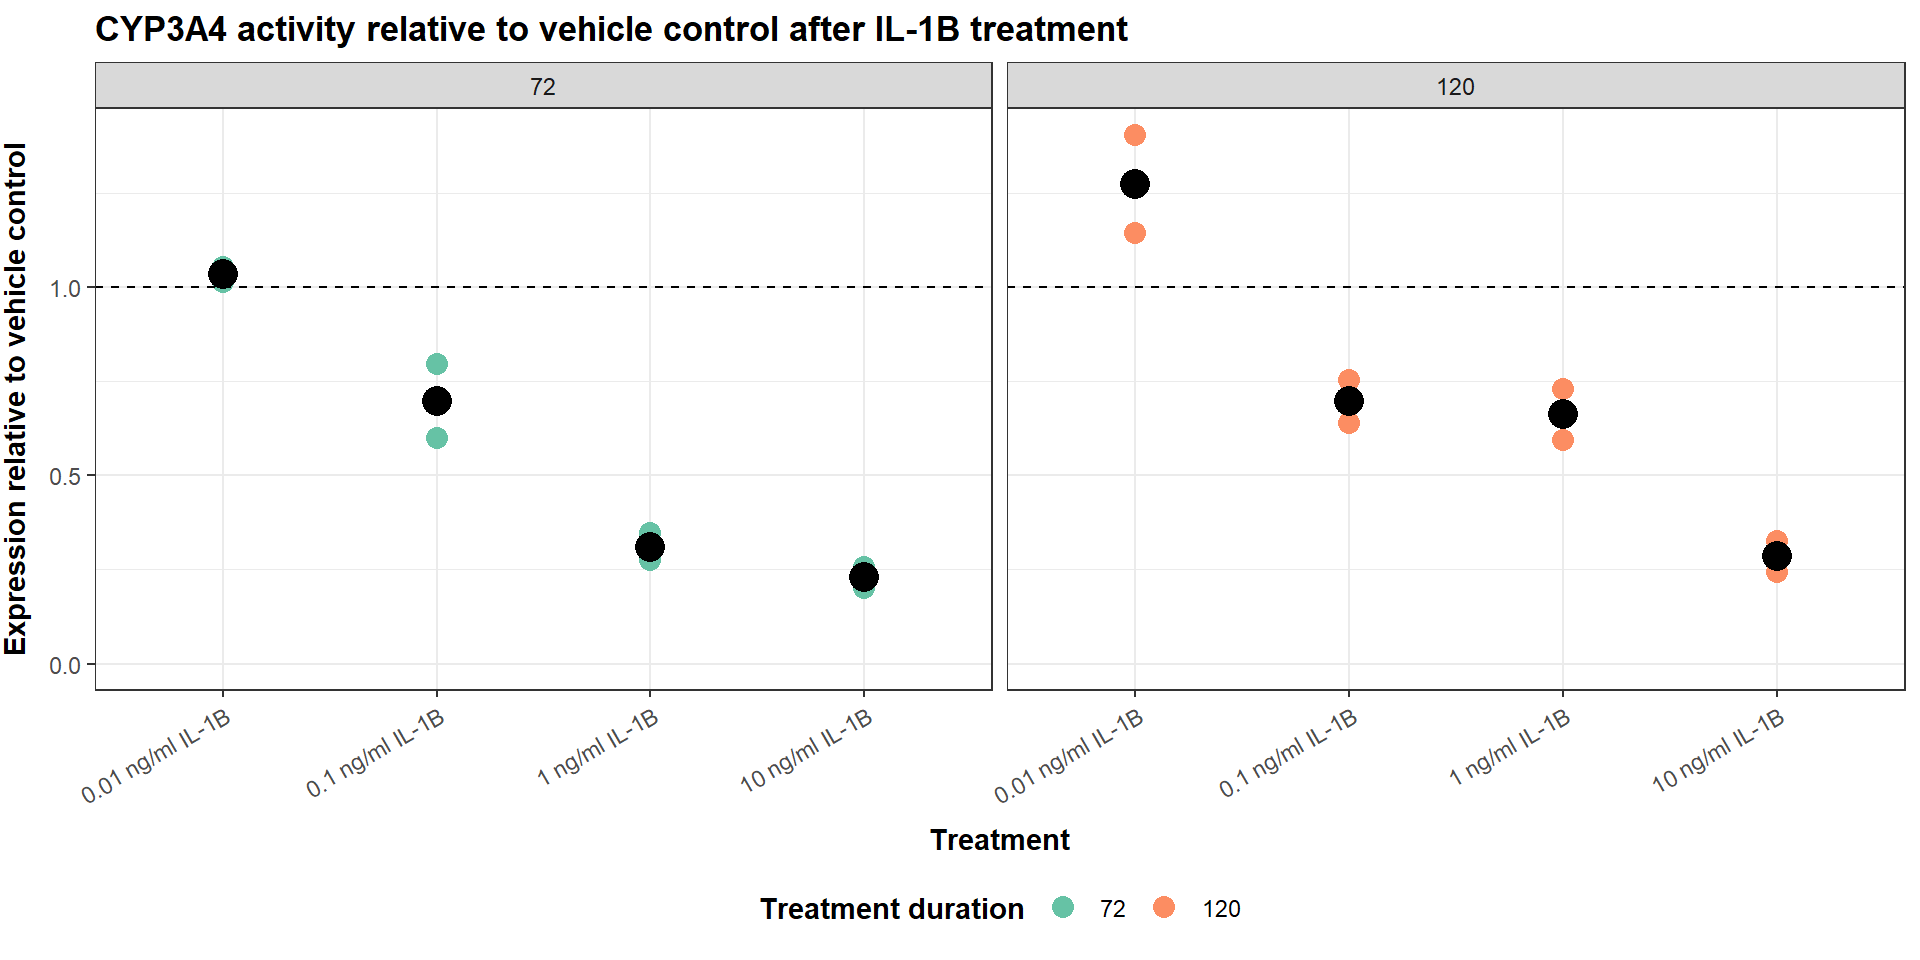

In [ ]:

plot_data_I1B <- data[time_incubation == 0.5 
                      & treatment %in% group_IL1B
                      & time_treatment != 24]


ggplot(data = plot_data_I1B) +
  geom_point(
    mapping = aes(x = treatment, y = mean_relative_amount, color = factor(time_treatment)),
    size = 3.5
  ) +
  stat_summary(
    fun = "mean",
    geom = "point",
    mapping = aes(x = treatment, y = mean_relative_amount),
    size = 5
  ) +
  scale_color_brewer(palette = "Set2") +
  facet_wrap(facets = vars(time_treatment)) +
  labs(title = "CYP3A4 activity relative to vehicle control after IL-1B treatment",
       x = "Treatment",
       y = "Expression relative to vehicle control",
       color = "Treatment duration"
       ) + 
  scale_y_continuous(limits = c(0, NA)) +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 30, hjust = 1),
        axis.title.y = element_text(vjust = 3, face = "bold"),
        axis.title.x = element_text(vjust = -1.5, face ="bold"),
        plot.title = element_text(face = "bold"),
        legend.title = element_text(face = "bold"),
        legend.position = "bottom"
     ) +
  geom_hline(yintercept = 1, linetype = "dashed")


### Timepoints combined

IL-6

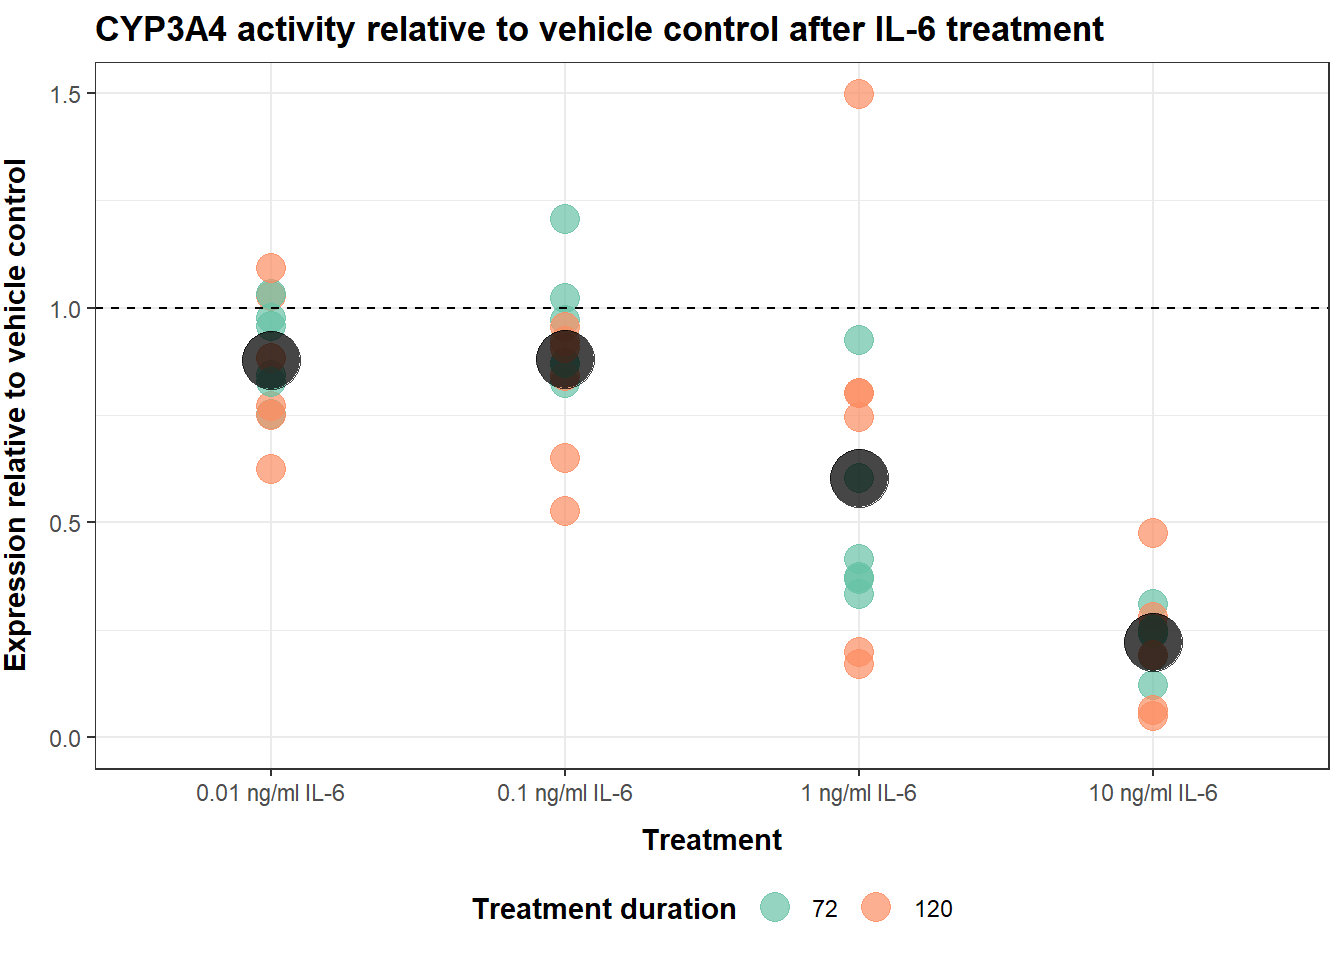

In [ ]:

IL6_combined_data <- 
  data[time_incubation == 0.5
       & treatment %in% group_IL6
       & time_treatment != 24]

IL6_combined_data[,
                  overall_mean := mean(mean_relative_amount),
                  by = .(treatment)]


ggplot(data = IL6_combined_data) +
  geom_point(aes(x = treatment,
                 y = relative_amount,
                 color = factor(time_treatment)
                 ),
             size = 5,
             alpha = 0.7
             ) +
  scale_color_brewer(palette = "Set2") +
  geom_point(aes(x = treatment,
                 y = overall_mean),
             size = 10,
             alpha = 0.1
             ) +
  labs(title = "CYP3A4 activity relative to vehicle control after IL-6 treatment",
       x = "Treatment",
       y = "Expression relative to vehicle control",
       color = "Treatment duration"
       ) +
  geom_hline(yintercept = 1, linetype = "dashed") +
  theme_bw() +
  theme(#axis.text.x = element_text(angle = 30, hjust = 1),
        axis.title.y = element_text(vjust = 3, face = "bold"),
        axis.title.x = element_text(vjust = -1.5, face ="bold"),
        plot.title = element_text(face = "bold"),
        legend.title = element_text(face = "bold"),
        legend.position = "bottom"
     ) +
  scale_y_continuous(limits = c(0, NA))


IL-1B

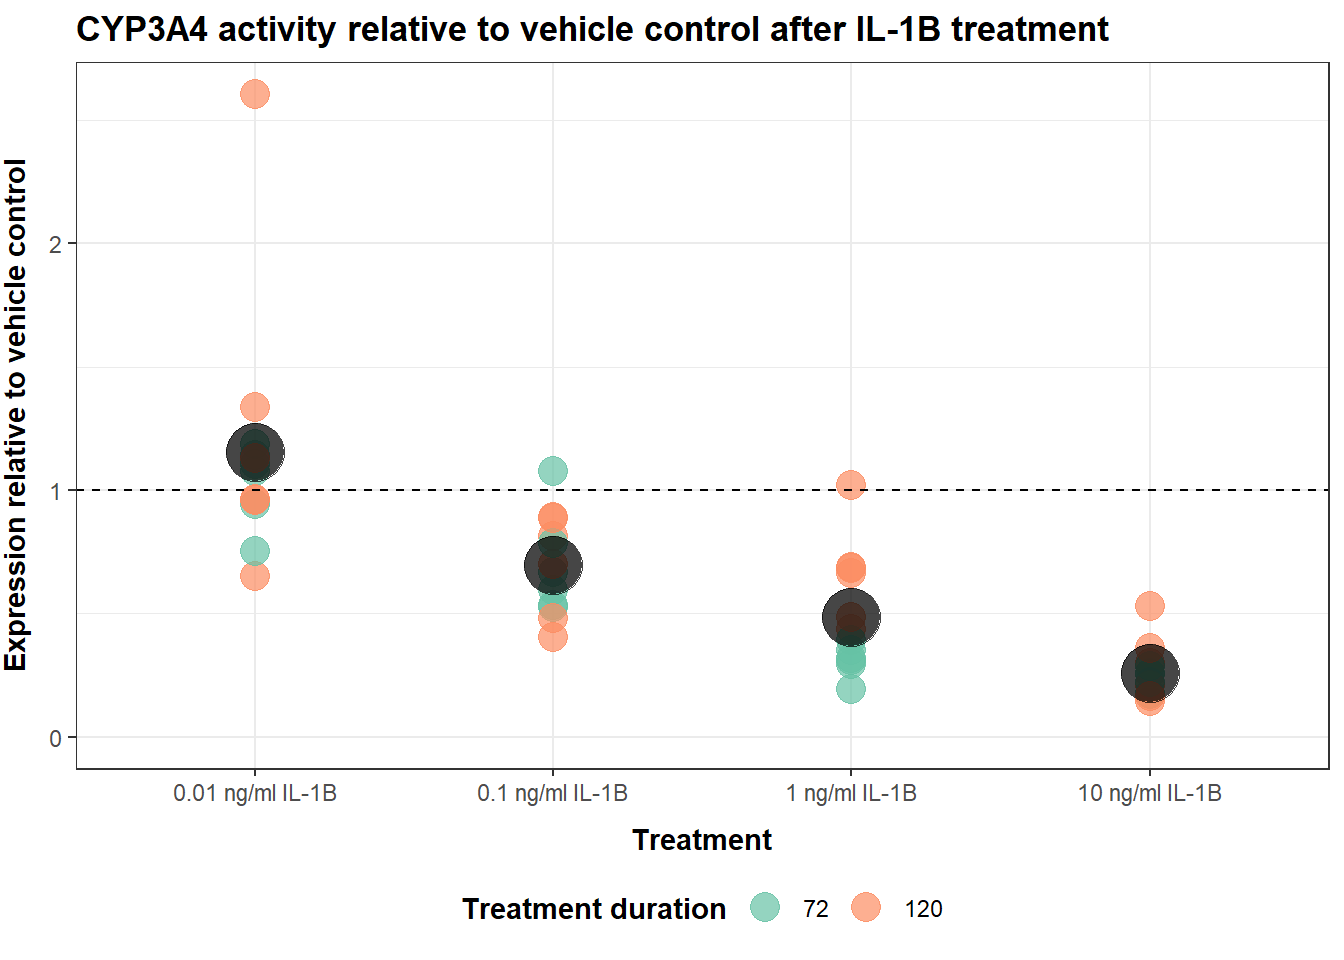

In [ ]:

IL1B_combined_data <- 
  data[time_incubation == 0.5
       & treatment %in% group_IL1B
       & time_treatment != 24]

IL1B_combined_data[,
                  overall_mean := mean(mean_relative_amount),
                  by = .(treatment)]


ggplot(data = IL1B_combined_data) +
  geom_point(aes(x = treatment,
                 y = relative_amount,
                 color = factor(time_treatment)
                 ),
             size = 5,
             alpha = 0.7
             ) +
  scale_color_brewer(palette = "Set2") +
  geom_point(aes(x = treatment,
                 y = overall_mean),
             size = 10,
             alpha = 0.1
             ) +
  labs(title = "CYP3A4 activity relative to vehicle control after IL-1B treatment",
       x = "Treatment",
       y = "Expression relative to vehicle control",
       color = "Treatment duration"
       ) +
  geom_hline(yintercept = 1, linetype = "dashed") +
  theme_bw() +
  theme(#axis.text.x = element_text(angle = 30, hjust = 1),
        axis.title.y = element_text(vjust = 3, face = "bold"),
        axis.title.x = element_text(vjust = -1.5, face ="bold"),
        plot.title = element_text(face = "bold"),
        legend.title = element_text(face = "bold"),
        legend.position = "bottom"
     ) +
  scale_y_continuous(limits = c(0, NA))


## EC50